# Explore here

In [13]:
import pandas as pd

# Replace this URL with your dataset URL or file path
data_url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

# Load the dataset into the data variable
data = pd.read_csv(data_url)

# Verify that the data has been loaded correctly
print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [14]:
# Properly scale and encode data once
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler

# One-hot encode region and binary encode smoker/sex
data = pd.get_dummies(data, columns=['region'], drop_first=True)
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})

# Separate features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid search for Ridge
ridge_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_search.fit(X_train, y_train)

# Grid search for Lasso
lasso_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_search.fit(X_train, y_train)

# Best Ridge and Lasso models
ridge_best = ridge_search.best_estimator_
lasso_best = lasso_search.best_estimator_

# Evaluation on test set
for model, name in zip([ridge_best, lasso_best], ['Ridge', 'Lasso']):
    y_pred = model.predict(X_test)
    print(f"{name} Regression Evaluation:")
    print(f"Best Alpha: {model.alpha}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R-squared: {r2_score(y_test, y_pred):.2f}\n")


Ridge Regression Evaluation:
Best Alpha: 10
MSE: 33685648.23
MAE: 4197.50
R-squared: 0.78

Lasso Regression Evaluation:
Best Alpha: 100
MSE: 34057496.42
MAE: 4210.35
R-squared: 0.78



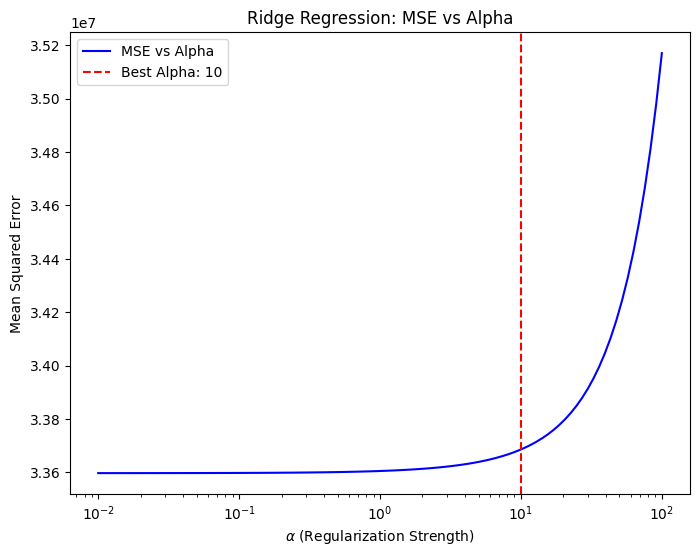

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Ridge MSE vs Alpha
alphas = np.logspace(-2, 2, 100)
mse_list = [mean_squared_error(y_test, Ridge(alpha=a).fit(X_train, y_train).predict(X_test)) for a in alphas]

plt.figure(figsize=(8, 6))
plt.plot(alphas, mse_list, label='MSE vs Alpha', color='blue')
plt.xscale('log')
plt.xlabel(r'$\alpha$ (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: MSE vs Alpha')
plt.axvline(ridge_best.alpha, color='red', linestyle='--', label=f'Best Alpha: {ridge_best.alpha}')
plt.legend()
plt.show()


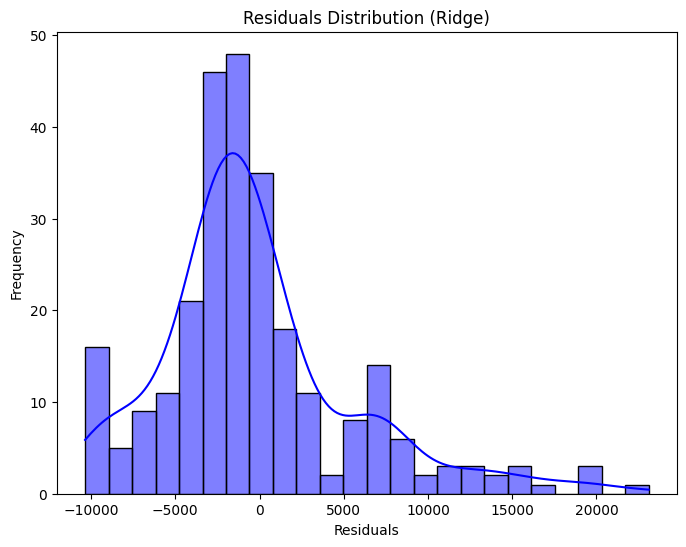

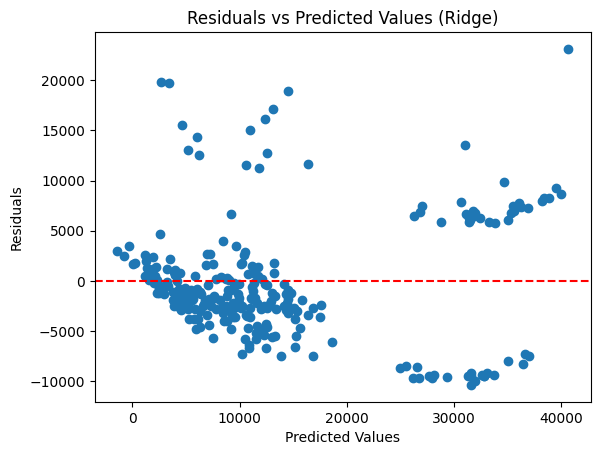

In [17]:
# Residuals for Ridge model
y_pred_ridge = ridge_best.predict(X_test)
residuals_ridge = y_test - y_pred_ridge

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_ridge, kde=True, color='blue')
plt.title('Residuals Distribution (Ridge)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.scatter(y_pred_ridge, residuals_ridge)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Ridge)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
